In [70]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import tkinter as tk
import matplotlib.colors as mcolors
import pandas as pd
import shapely as shape

In [71]:
shp_file = '/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/VA?/tl_2020_51_vtd20.shp'
gdf = gpd.read_file(shp_file)

gdf['centroid'] = gdf['geometry'].centroid
gdf["centroid_x"] = gdf['geometry'].centroid.x
gdf["centroid_y"] = gdf['geometry'].centroid.y

/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_3490/1261627306.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid
/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_3490/1261627306.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid_x"] = gdf['geometry'].centroid.x
/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_3490/1261627306.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid_y"] = gdf['geometry'].centroid.y


In [72]:
gdf = gdf[["geometry","centroid_x","centroid_y"]]

In [44]:
gdf.shape

(2465, 3)

In [73]:
# All the rows with MultiPolygon objects
multi_rows = gdf[gdf["geometry"].apply(lambda x: isinstance(x, shape.geometry.multipolygon.MultiPolygon))]
multi_rows

,geometry,centroid_x,centroid_y
3,"MULTIPOLYGON (((-77.28683 37.26966, -77.28653 ...",-77.242165,37.258839
151,"MULTIPOLYGON (((-76.22488 36.75309, -76.22013 ...",-76.215962,36.730953
278,"MULTIPOLYGON (((-77.07557 38.86714, -77.07411 ...",-77.073670,38.864436
1405,"MULTIPOLYGON (((-77.38320 38.64169, -77.38263 ...",-77.377865,38.631226
2000,"MULTIPOLYGON (((-76.42953 37.10582, -76.42770 ...",-76.425313,37.126225


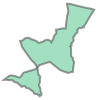

In [79]:
gdf["geometry"][3]

In [11]:
gdf_without = gdf.drop(labels=list(multi_rows.index))

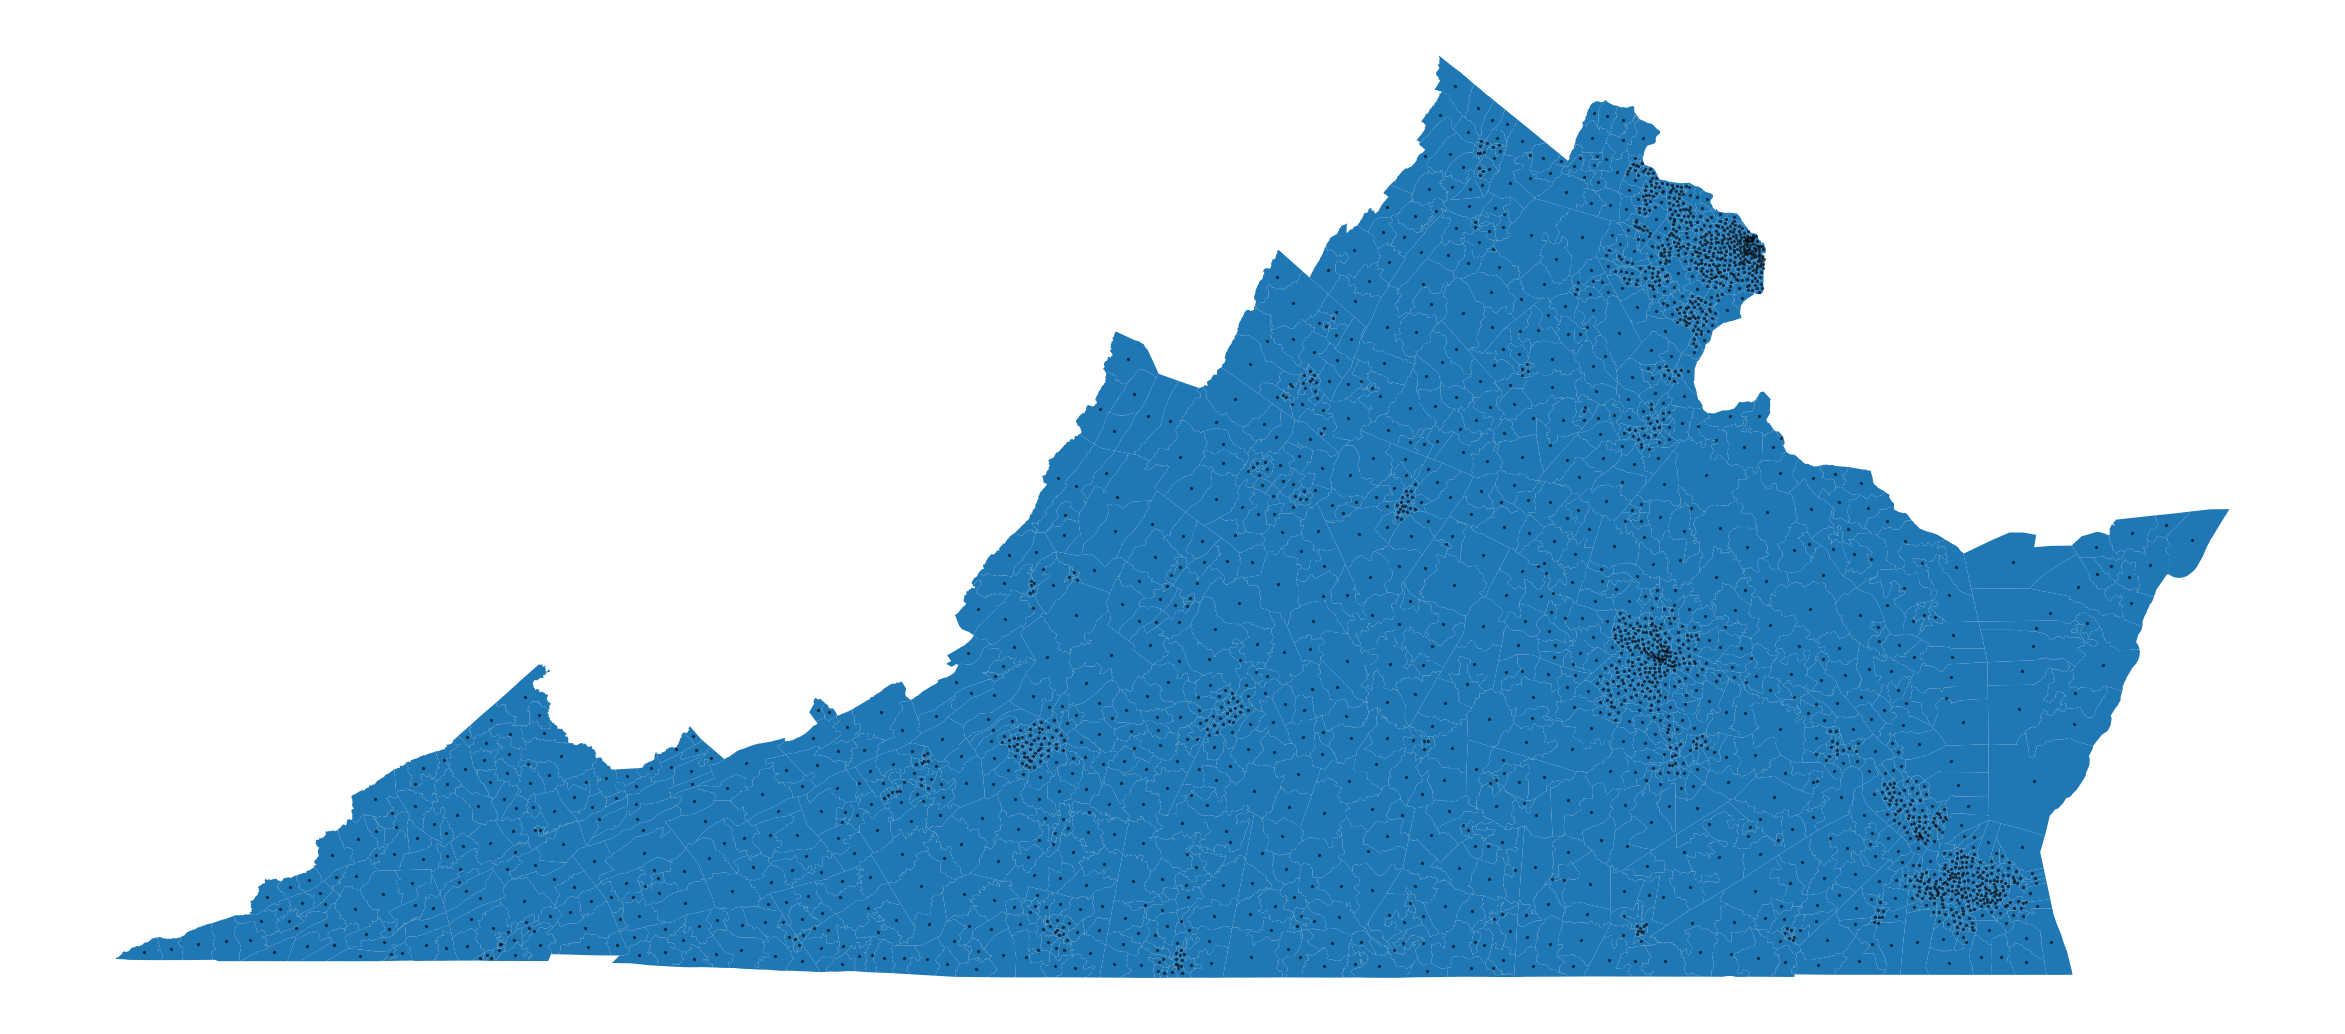

In [65]:
fig, ax = plt.subplots(1,1,figsize=(30,30))
gdf.plot(ax=ax)
ax.scatter(gdf['centroid_x'], gdf['centroid_y'], s=2, color='k', alpha=.5, picker=True)

ax.axis('off')

plt.show()

In [43]:
len(ax.collections[0].get_paths())

2470